In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import imageio.v2 as imageio
import os
import random
import torch.nn.functional as F
from PIL import Image

this PyTorch Linear Classification model predict one chinese number character. 
```
{
  0: "十",
  1: "一",
  2: "二",
  3: "三",
  4: "四",
  5: "五",
  6: "六",
  7: "七",
  8: "八",
  9: "九",
}
```


In [2]:
prediction_character = "6"

In [3]:
class MNIST_CH_Dataset(torch.utils.data.Dataset):
    def __init__(self,img_dir,images,transforms=None):
        self.img_dir = img_dir
        self.inputs = images
        self.transforms = transforms
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.inputs[idx])
        np_image = imageio.imread(img_path)
        PIL_image = Image.fromarray(np_image)
        if self.transforms:
            PIL_image = self.transforms(PIL_image)
        np_image_input = torch.from_numpy(np_image.astype(np.float32))
        input = F.normalize(np_image_input)
        target =torch.tensor([float(1 if self.inputs[idx].split('.')[-2][-1] == prediction_character else 0 )])
        name = self.inputs[idx]
        return input,target,name

In [4]:
totalImages = os.listdir( os.getcwd()+"/MNIST-CH")

trainImages =[]
testImages =[]

for index in range(len(totalImages)):
    image = totalImages[index]
    if image.endswith(".jpg"):
        if index <= 100:
            trainImages.append(image)
        else:
            testImages.append(image)

print(len(trainImages))
print(len(testImages))

100
20


In [5]:
transform_image = transforms.Compose([
                                      transforms.RandomRotation(15),
                                      transforms.RandomCrop(32),
                                      transforms.ToTensor(),
                                      ])

train_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=trainImages, transforms=transform_image )
test_dataset = MNIST_CH_Dataset(img_dir=os.getcwd()+"/MNIST-CH",  images=testImages,transforms=transform_image )


In [6]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False)


In [7]:
model = nn.Sequential(
    nn.Linear(1024, 1),
    nn.Sigmoid()
)

In [8]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
n_epochs = 2

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    train_loss = []
    print(it)
    for inputs, targets,name in train_dataloader:
        optimizer.zero_grad()
        # print(inputs.shape)
        inputs = inputs.view(-1, 1024)
        # print(inputs.shape,input.dtype)
        
        # print(targets.dtype)
        outputs = model(inputs)
        # print(outputs.dtype)
        
        # losss = criterion(outputs,targets)


0
1


In [10]:
n_epochs = 100

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs, targets,name in train_dataloader:
    # reshape the input
    inputs = inputs.view(-1, 1024)
    # zero the parameter gradients
    optimizer.zero_grad()
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    
    test_loss = []
    for inputs, targets,name in test_dataloader:
        inputs = inputs.view(-1, 1024)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)


  train_loss = np.mean(train_loss) # a little misleading
  train_losses[it] = train_loss
  test_losses[it] = test_loss
  if (it + 1) % 10 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')



Epoch 10/100, Train Loss: 0.2550, Test Loss: 0.4111
Epoch 20/100, Train Loss: 0.1690, Test Loss: 0.3275
Epoch 30/100, Train Loss: 0.1170, Test Loss: 0.2715
Epoch 40/100, Train Loss: 0.0854, Test Loss: 0.2387
Epoch 50/100, Train Loss: 0.0647, Test Loss: 0.2182
Epoch 60/100, Train Loss: 0.0508, Test Loss: 0.2031
Epoch 70/100, Train Loss: 0.0408, Test Loss: 0.1947
Epoch 80/100, Train Loss: 0.0335, Test Loss: 0.1884
Epoch 90/100, Train Loss: 0.0280, Test Loss: 0.1838
Epoch 100/100, Train Loss: 0.0237, Test Loss: 0.1803


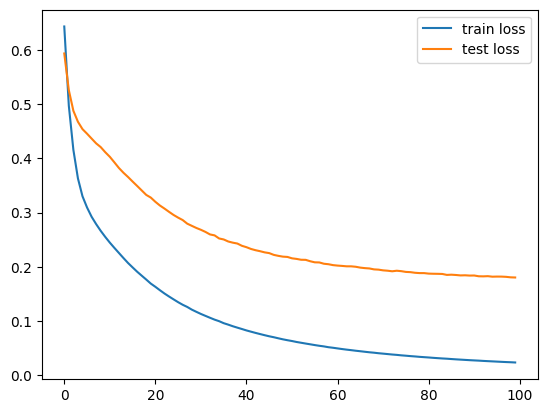

In [11]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [12]:
# accuracy
n_correct = 0.
n_total = 0.
for inputs, targets,name in train_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  # Get prediction
  predictions =  torch.round(outputs)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets,name in test_dataloader:
  inputs = inputs.view(-1, 1024)
  outputs = model(inputs)
  predictions =  torch.round(outputs)
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]
test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 1.0000, Test acc: 0.9500


In [50]:
index = random.randrange(20)
test_image_path = os.path.join(os.getcwd()+"/MNIST-CH", testImages[index])

test_image_np = imageio.imread(test_image_path)
        
test_image_input = torch.from_numpy(test_image_np.astype(np.float32))

image_input = F.normalize(test_image_input)
image_input = image_input.view(-1, 1024)
predition = model(image_input)


# print(testImages[index])
# print(predition)
result = True if np.round(predition.item()) == 1 else False
print(f'Predition image {testImages[index]} for character {prediction_character} (六), Result:{result}')



Predition image chinese_numbers_v3_0001s_0005_6.jpg for character 6 (六), Result:True
